
# Assignment No 4b
###### *Course Instructors: Dr. Hassan Raza, Mr. Ahmad Raza*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests.For this part you will be implementing randomized version of **Randomized Linear** weak learner based Random Forest, i.e. you will be randomly selecting a pair of  features from all set of features and than randomly selecting the parameters for a generic equation of line,i.e. $ax+by+c=0$.

## TODO: 

**Complete the child class LinearWeakLearner in file `weaklearner.py` by writing the missing code.**

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the google classroom (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [114]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\muham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\pylab.py:166: UserWarning: pylab import has clobbered these variables: ['cov']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [115]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [116]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

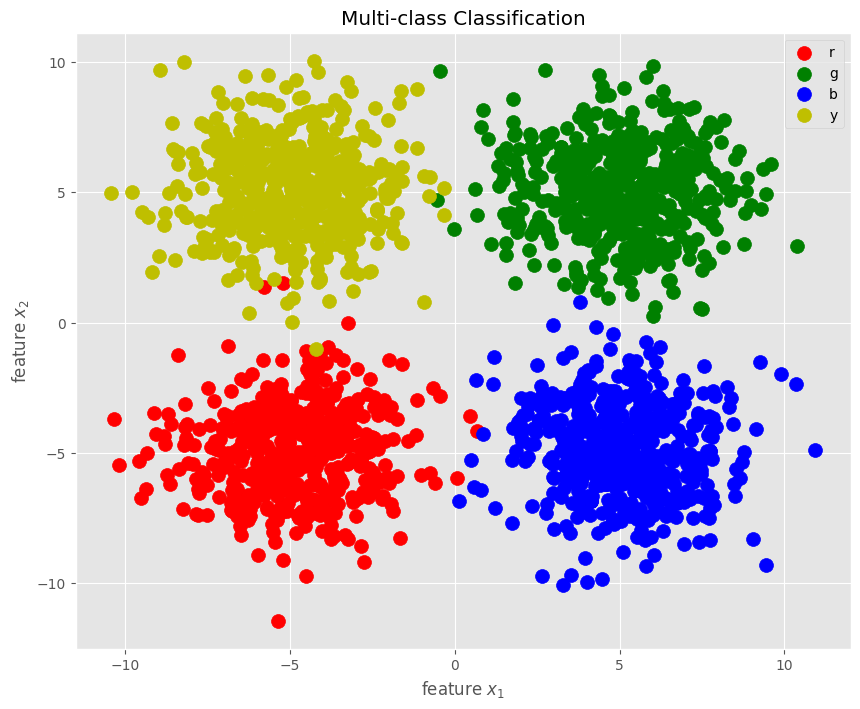

In [117]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
xint=int(nexamples/4)
x1 = np.random.multivariate_normal(mean1,cov,xint)
x2 = np.random.multivariate_normal(mean2,cov,xint)
x3 = np.random.multivariate_normal(mean3,cov,xint)
x4 = np.random.multivariate_normal(mean4,cov,xint)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((xint,1)),2*np.ones((xint,1)),3*np.ones((xint,1)),4*np.ones((xint,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
xint2=int(ntexamples/4)
x1 = np.random.multivariate_normal(mean1,cov,xint2)
x2 = np.random.multivariate_normal(mean2,cov,xint2)
x3 = np.random.multivariate_normal(mean3,cov,xint2)
x4 = np.random.multivariate_normal(mean4,cov,xint2)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((xint2,1)),2*np.ones((xint2,1)),3*np.ones((xint2,1)),4*np.ones((xint2,1))))


In [130]:
import randomForest as rf


In [131]:
rfc=rf.RandomForest(weaklearner='Linear')

In [132]:
print (X.shape, Y.shape)

(2000, 2) (2000, 1)


In [133]:
%pdb
rfc.train(X,Y)

Automatic pdb calling has been turned ON


In [134]:
len(rfc.trees)

10

In [135]:
%pdb
# Training Confusion Matrix...
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned OFF
(2000, 1) 2000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        498    0    0    2   500
2.0          0  497    3    0   500
3.0          5    1  494    0   500
4.0          6    6    0  488   500
All        509  504  497  490  2000

In [136]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp).flatten())/ float(Y.shape[0])
print(acc)
assert_greater_equal(acc, 0.78)

0.9885


c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


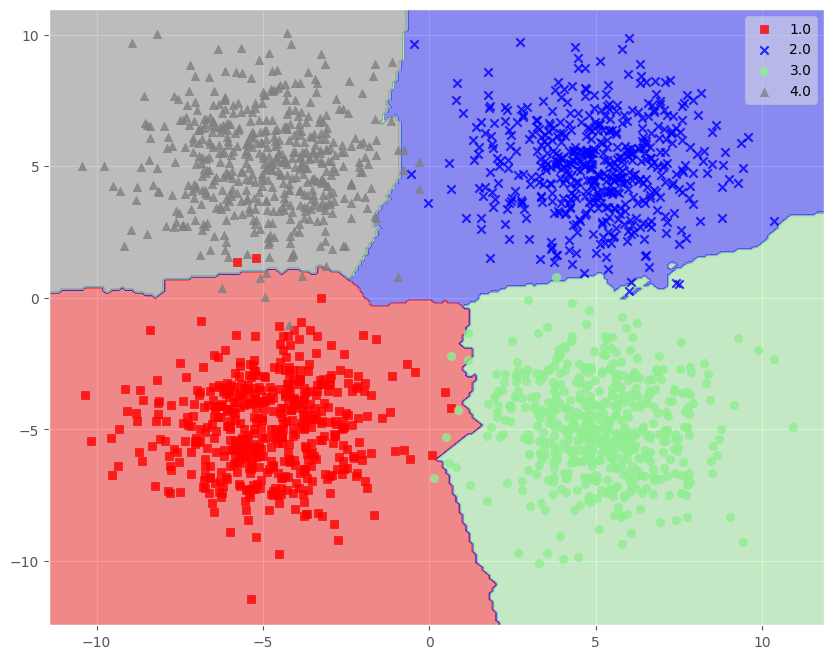

In [137]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [139]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print(Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted  1.0  2.0  3.0  4.0   All
Actual                             
1.0        250    0    0    0   250
2.0          0  248    2    0   250
3.0          6    0  244    0   250
4.0          4    4    0  242   250
All        260  252  246  242  1000

In [140]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)

c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


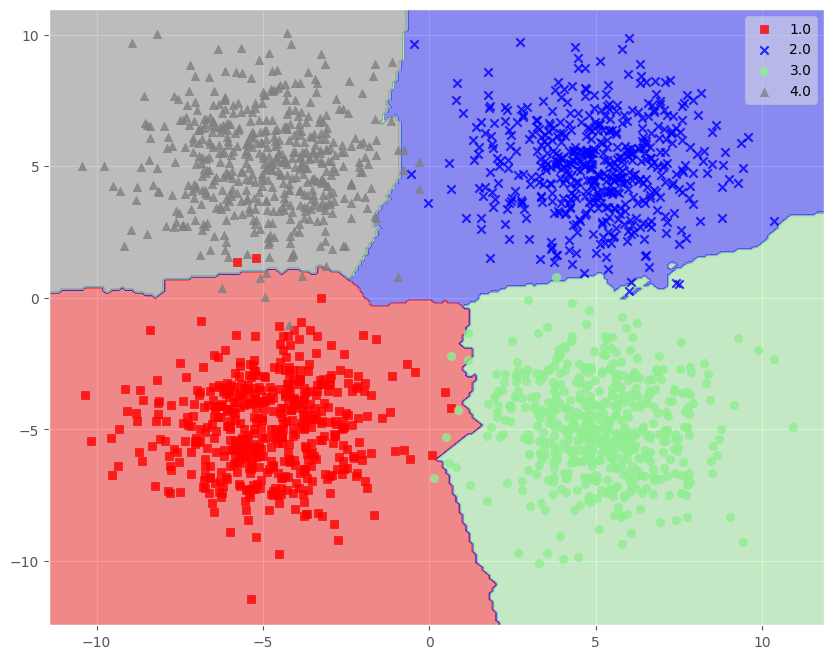

In [141]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

Automatic pdb calling has been turned ON
(10000, 2)
[np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0)]


AttributeError: 'Axes' object has no attribute 'hold'

> c:\users\muham\onedrive\documents\semester 5\ml assignments\a4\tools.py(844)plot_points_range()
    842     ax.legend([str(c) for c in uclasses])
    843 
--> 844     ax.hold(True)
    845     ax.scatter(X[:,0],X[:,1],
    846                   c=list(map(lambda x:colors[uclasses.index(x)],Y)),

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


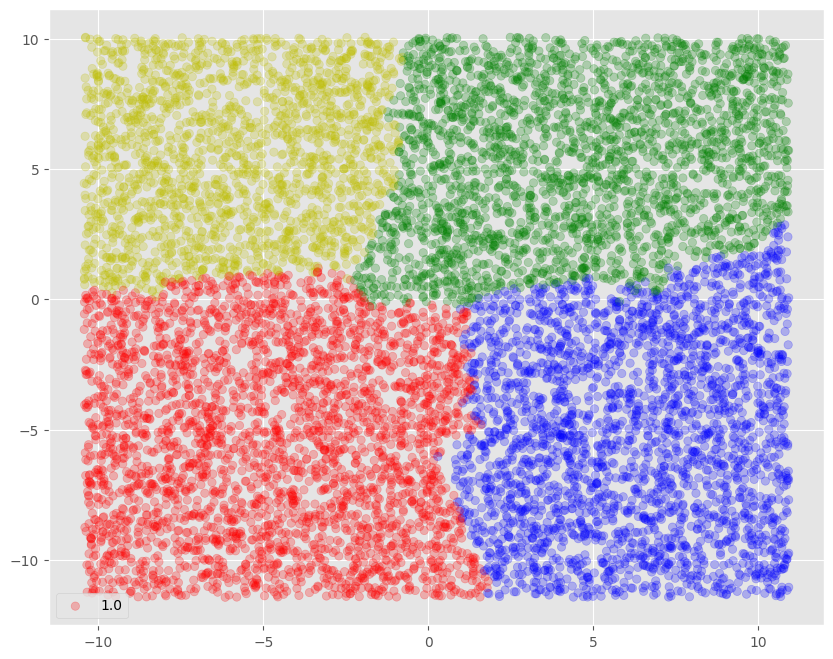

In [142]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
%pdb
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

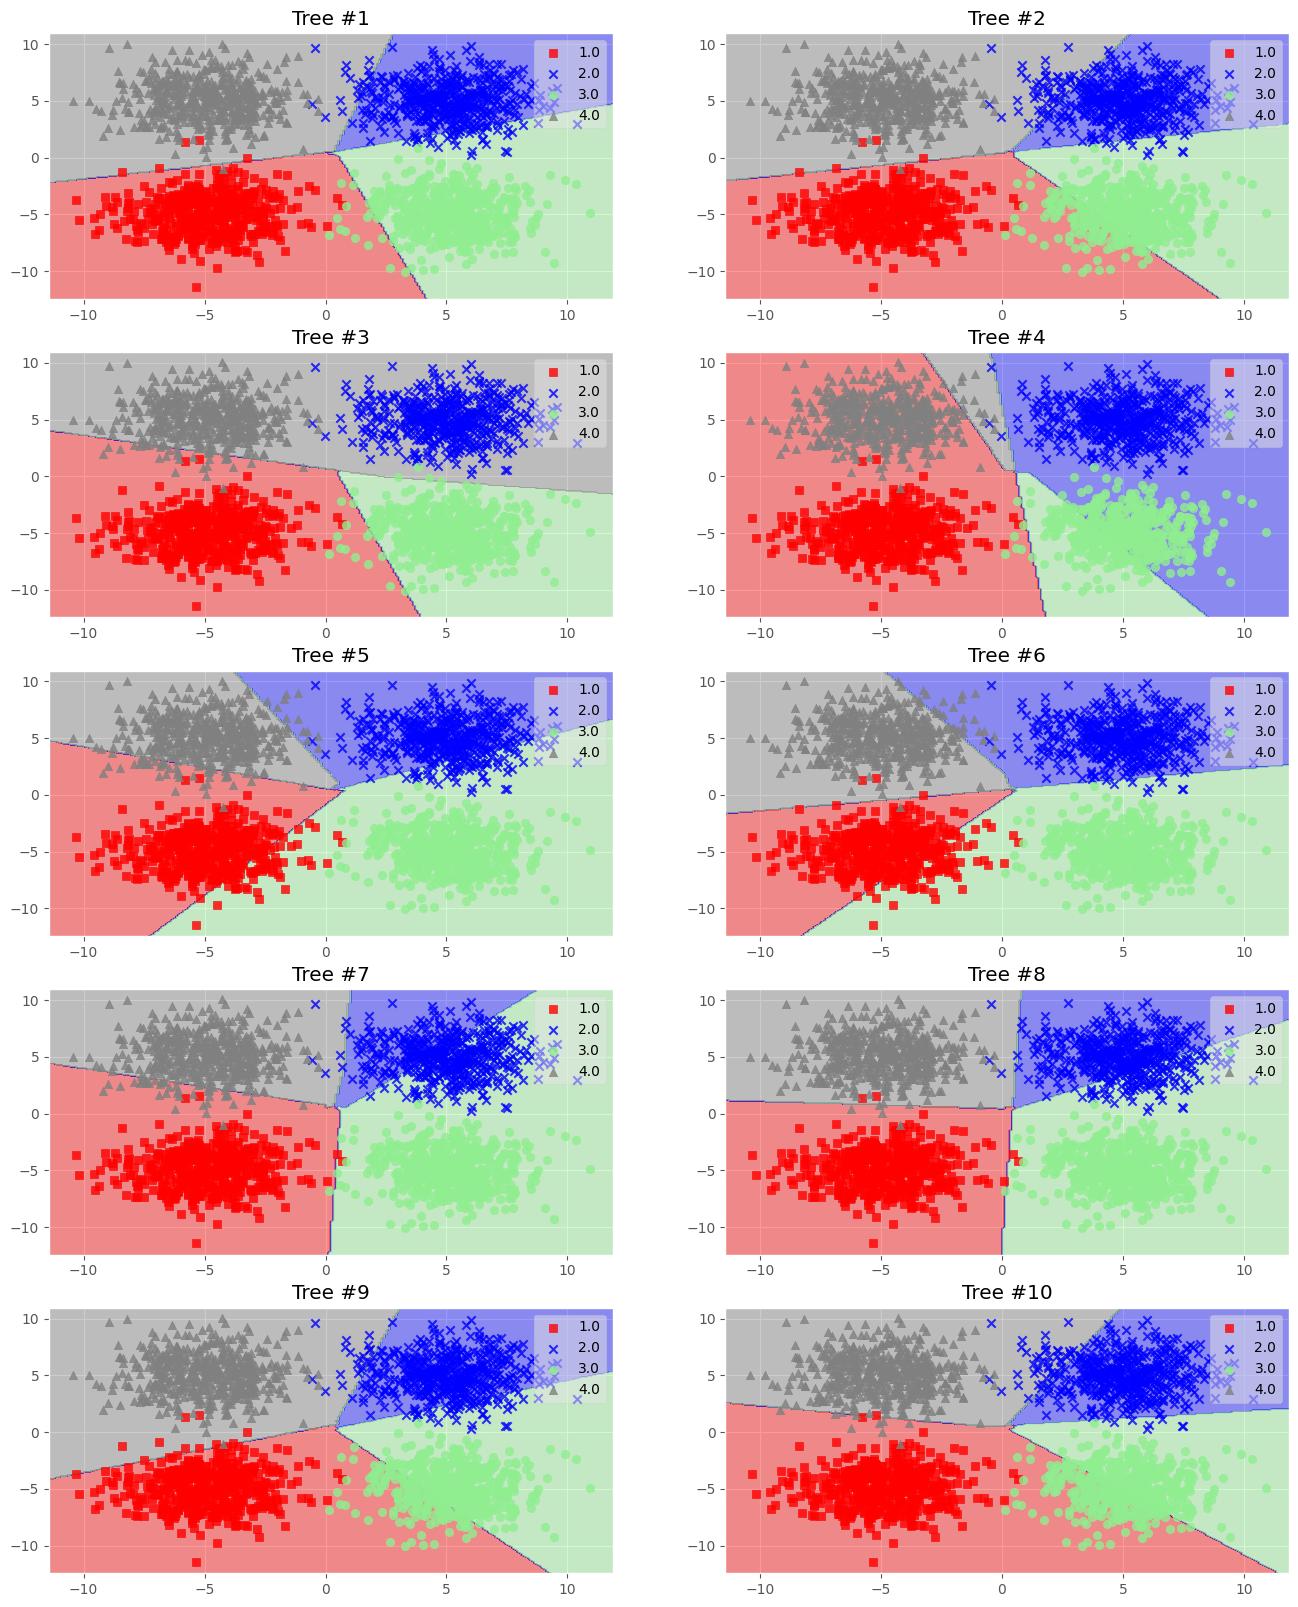

In [143]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(int(nrows),ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

#### What Can You conclude

## Lets Run on Nonlinear Data, The Spherical Examples...

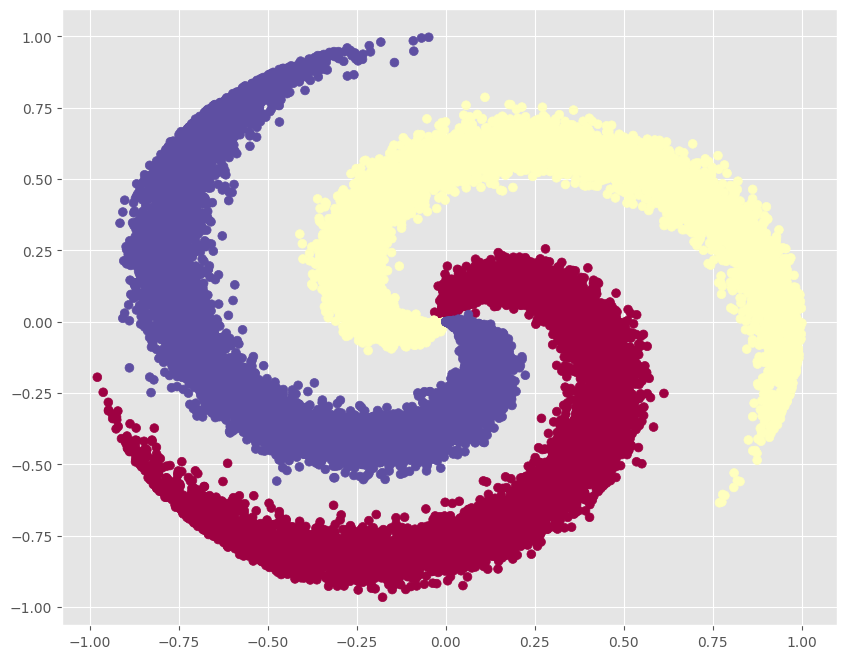

In [144]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)


In [146]:
print(X.shape, Y.shape)

(30000, 2) (30000,)


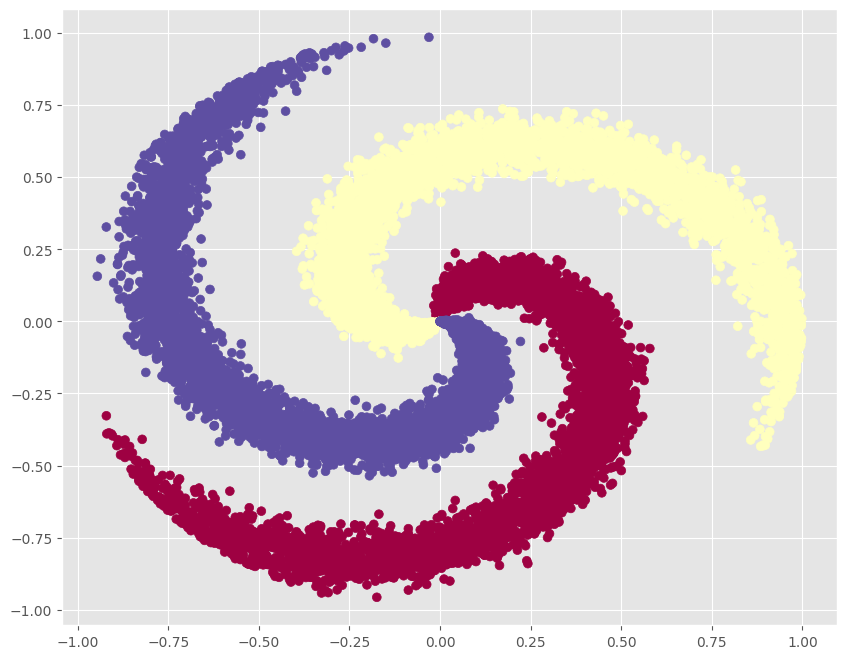

In [147]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [148]:
rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

In [150]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted     0     1      2    All
Actual                             
0          9228   188    584  10000
1             8  9309    683  10000
2             2    65   9933  10000
All        9238  9562  11200  30000

In [151]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print (Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted     0     1     2    All
Actual                            
0          4622    99   279   5000
1             2  4660   338   5000
2             1    34  4965   5000
All        4625  4793  5582  15000

In [157]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 
print(acc)
assert_greater_equal(acc, 0.78)

0.949


(10000, 2)
[np.int64(0), np.int64(1), np.int64(2)]


AttributeError: 'Axes' object has no attribute 'hold'

> c:\users\muham\onedrive\documents\semester 5\ml assignments\a4\tools.py(844)plot_points_range()
    842     ax.legend([str(c) for c in uclasses])
    843 
--> 844     ax.hold(True)
    845     ax.scatter(X[:,0],X[:,1],
    846                   c=list(map(lambda x:colors[uclasses.index(x)],Y)),

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


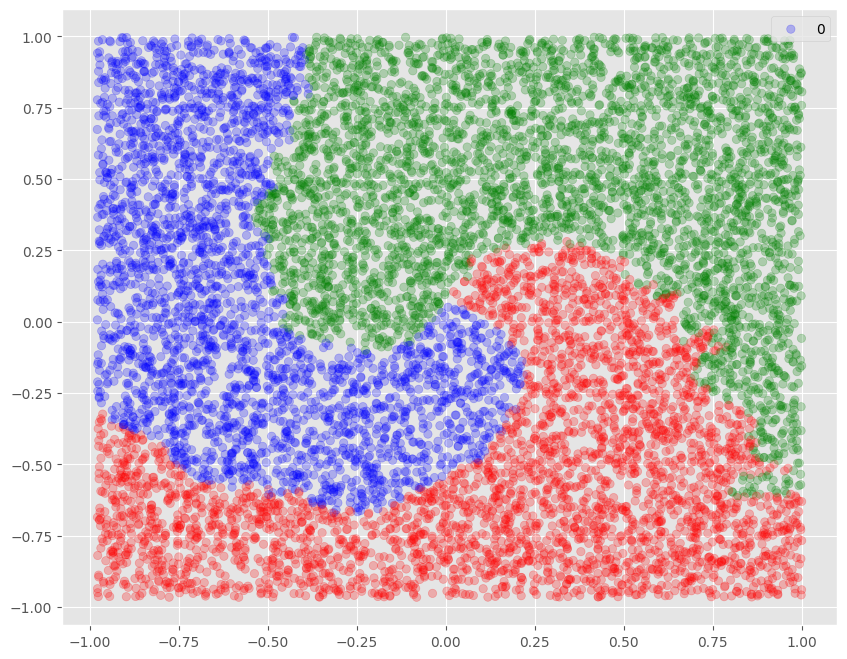

In [153]:
t.plot_points_range(rfc,X,Y)

c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


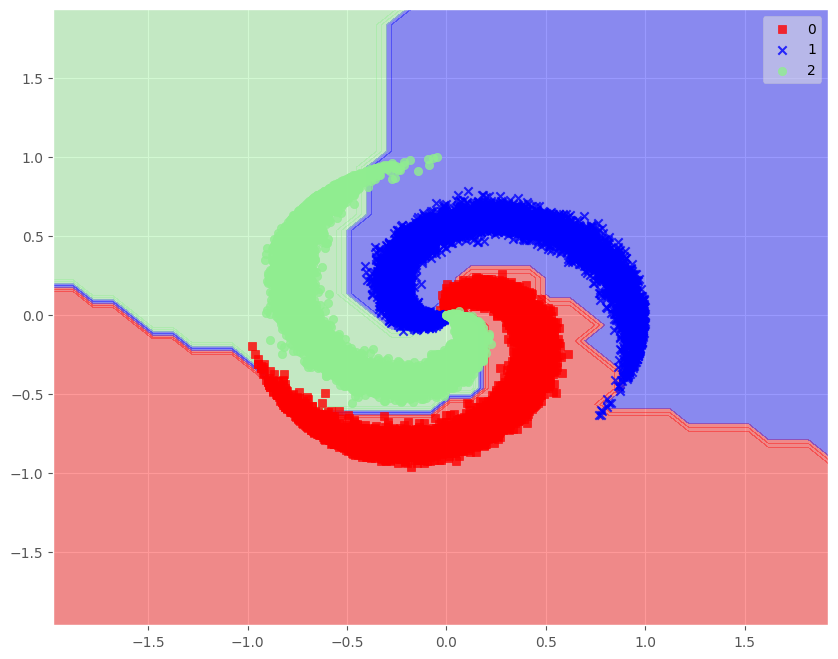

In [154]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

### Lets Plot Per-Tree Decision Boundary

c:\Users\muham\OneDrive\Documents\Semester 5\ML Assignments\A4\tools.py:698: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

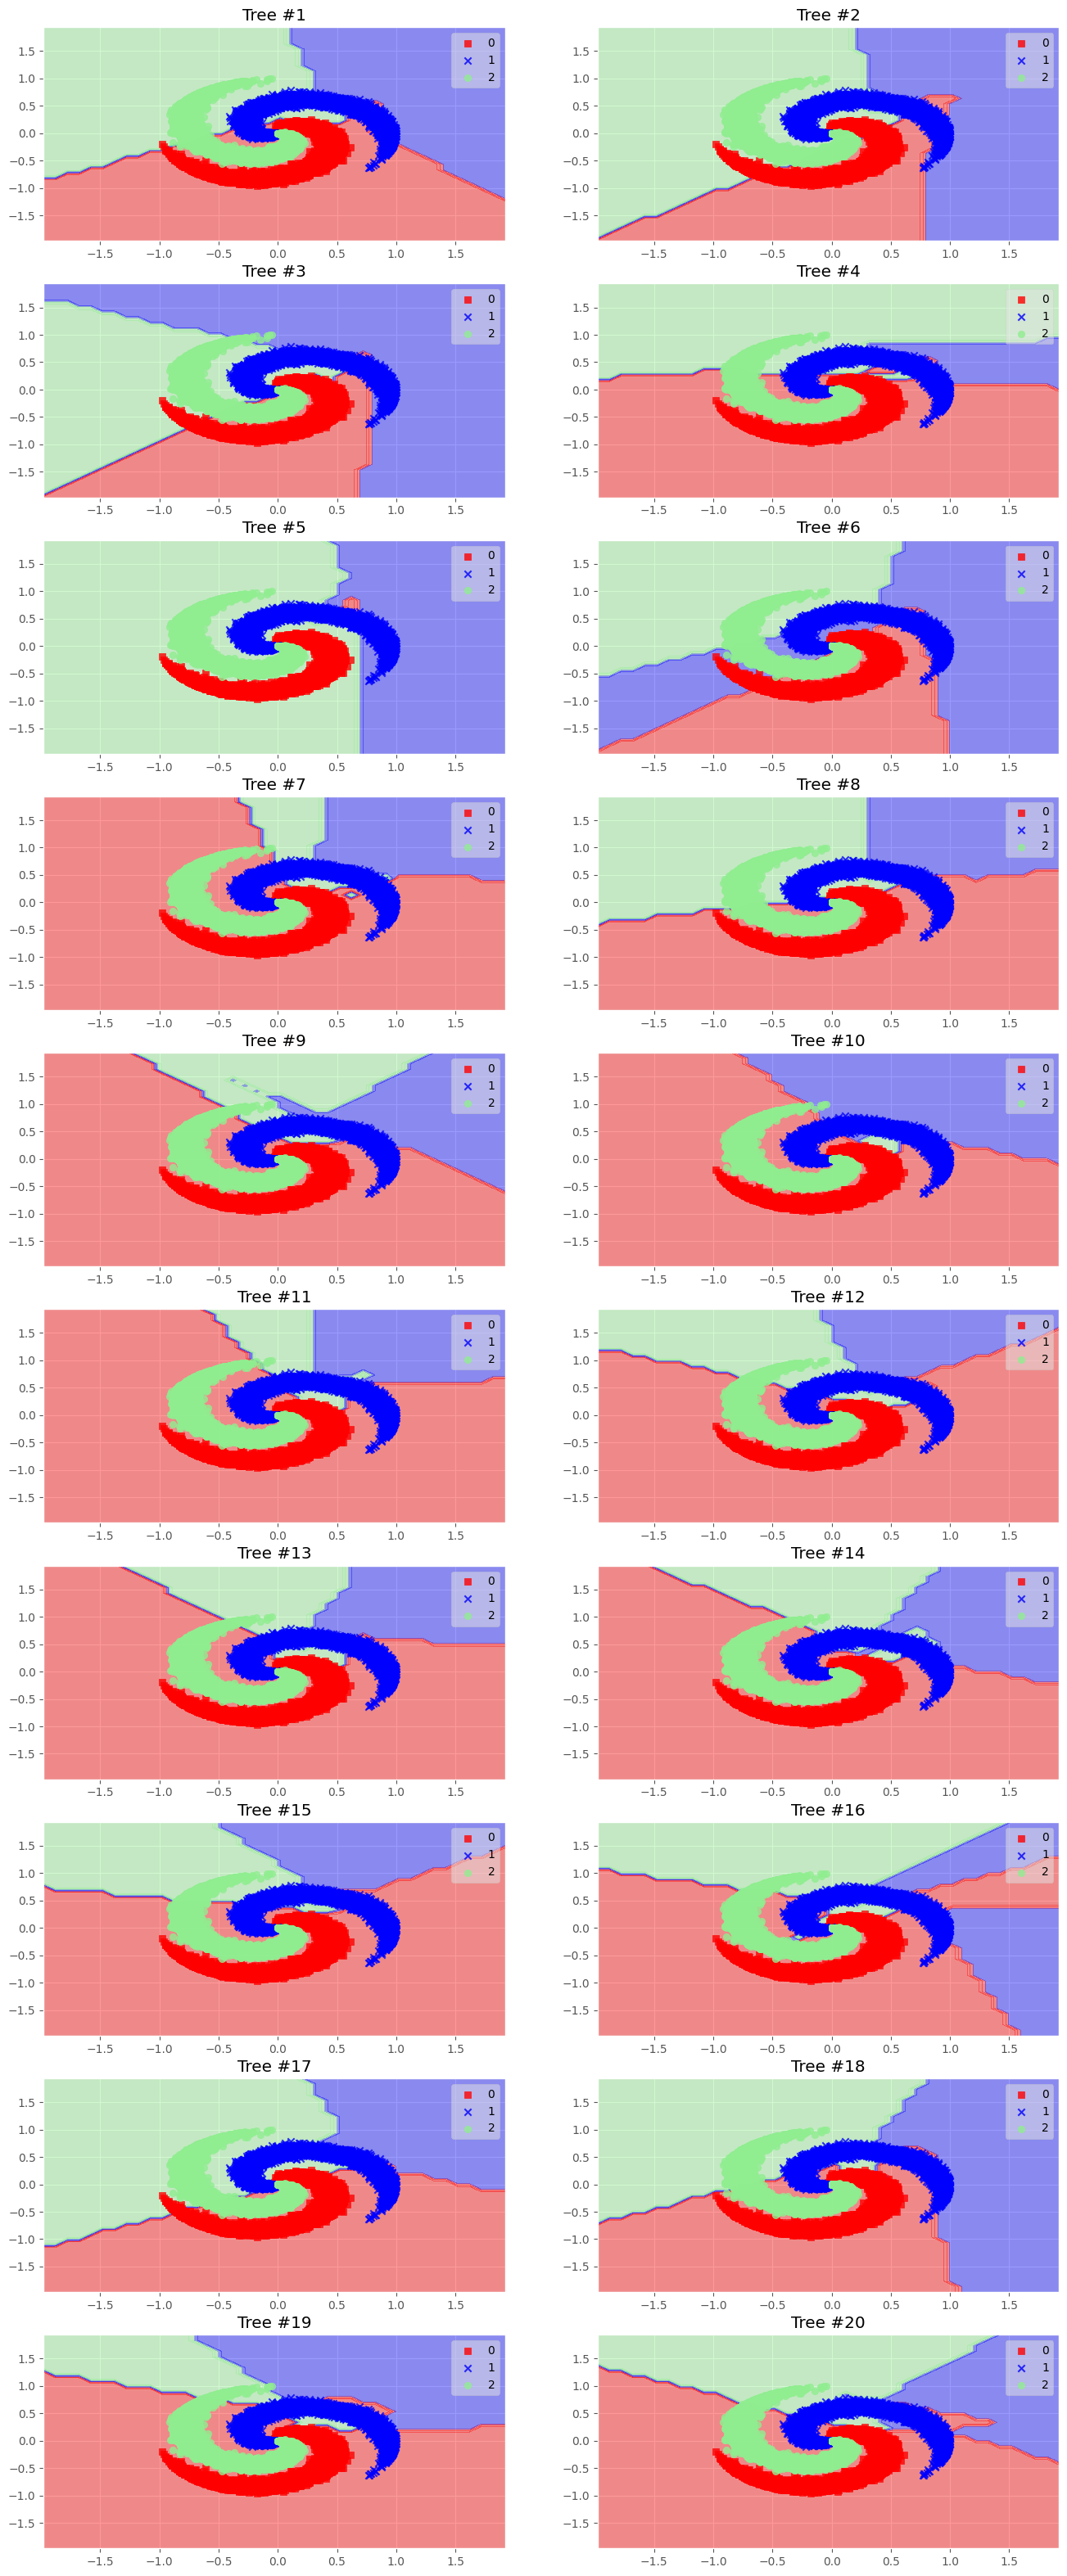

In [156]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(int(nrows),ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

## TODO: Find Optimal Number of Trees for this data set, using cross validation...

In [159]:
nfolds = 4  
folds = t.generate_folds(X, Y, nfolds) 
ntrees = np.arange(2, 20) 
mean_acc = [] 
for p in range(len(ntrees)):
    totacc = []  
    for k in range(nfolds):
        rfc = rf.RandomForest(ntrees=p, weaklearner='Linear')
        Ytrain = folds[k][1][: , np.newaxis]
        rfc.train(folds[k][0], folds[k][1])
        Ypt = rfc.predict(folds[k][2])
        accuracy = np.sum(Ypt == folds[k][3]) / float(folds[k][3].shape[0])
        totacc.append(accuracy)  
    mean_accuracy = np.mean(totacc)
    mean_acc.append(mean_accuracy)
    print(f"Mean accuracy for {ntrees[p]} trees: {mean_accuracy:.4f}")
    
    
optimal_trees = ntrees[np.argmax(mean_acc)]

print("Optimal trees " , optimal_trees)

Generating CV data for 3 classes
Mean accuracy for 2 trees: 0.0000
Mean accuracy for 3 trees: 0.7315
Mean accuracy for 4 trees: 0.7709
Mean accuracy for 5 trees: 0.8732
Mean accuracy for 6 trees: 0.8563
Mean accuracy for 7 trees: 0.8941
Mean accuracy for 8 trees: 0.8973
Mean accuracy for 9 trees: 0.8978
Mean accuracy for 10 trees: 0.8827
Mean accuracy for 11 trees: 0.9101
Mean accuracy for 12 trees: 0.9011
Mean accuracy for 13 trees: 0.8853
Mean accuracy for 14 trees: 0.9074
Mean accuracy for 15 trees: 0.9114
Mean accuracy for 16 trees: 0.9065
Mean accuracy for 17 trees: 0.9254
Mean accuracy for 18 trees: 0.9295
Mean accuracy for 19 trees: 0.9479
Optimal trees  19
